## **Introduction**

 Analyze data on air quality with respect to carbon monoxide, a major air pollutant for the United States Environmental Protection Agency (EPA). The data includes information from more than 200 sites, identified by state, county, city, and local site names. The main goals for this project is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [97]:
data = pd.read_csv("epa_air_quality.csv")

In [98]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [99]:
data.describe()

,aqi_log
count,260.000000
mean,1.766921
std,0.714716
min,0.000000
25%,1.098612
50%,1.791759
75%,2.302585
max,3.931826


In [100]:
data["state_name"].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

In [101]:
np.mean(data["aqi_log"])

1.7669210929985582

In [102]:
np.median(data["aqi_log"])

1.791759469228055

In [103]:
np.min(data["aqi_log"])

0.0

In [104]:
np.max(data["aqi_log"])

3.9318256327243257

In [105]:
np.std(data["aqi_log"], ddof=1)

0.7147155520223721

<AxesSubplot:>

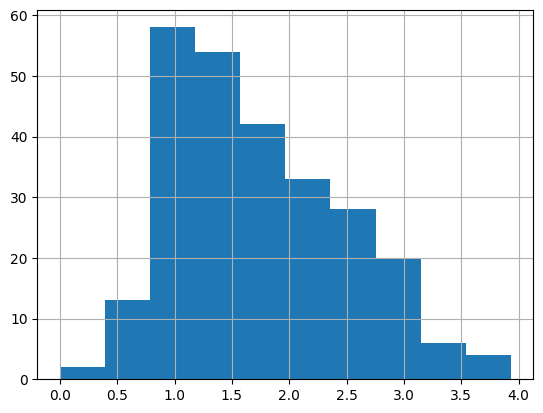

In [106]:
data["aqi_log"].hist()

Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well:

- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


In [107]:
mean_aqi_log = data["aqi_log"].mean()
mean_aqi_log

1.7669210929985582

In [108]:
std_aqi_log = data["aqi_log"].std()
std_aqi_log

0.7147155520223721

actual percentage of air quality index rate that fall within +/- 1 SD from the mean

In [109]:
lower_limit = mean_aqi_log - 1 * std_aqi_log
upper_limit = mean_aqi_log + 1 * std_aqi_log
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

actual percentage of air quality index rate that fall within +/- 2 SD from the mean

In [110]:
lower_limit = mean_aqi_log - 2 * std_aqi_log
upper_limit = mean_aqi_log + 2 * std_aqi_log
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

actual percentage of air quality index rate that fall within +/- 3 SD from the mean

In [111]:
lower_limit = mean_aqi_log - 3 * std_aqi_log
upper_limit = mean_aqi_log + 3 * std_aqi_log
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

Use Z-score to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

In [112]:
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1)
data

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557
...,...,...,...,...,...,...,...,...,...
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294,-0.532557
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612,-0.935070
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612,-0.935070
258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,2.302585,0.749479


In [113]:
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

West Phoenix is considered an outlier, this site can be studied further to determine what practices or changes might improve the air quality.

In [114]:
sampled_data = data.sample(n=50, replace=True, random_state=42)
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,1.098612,-0.935070
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,3.295837,2.139195
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,1.098612,-0.935070
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,2.397895,0.882833
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.693147,-1.502379
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,1.098612,-0.935070
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,1.098612,-0.935070
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,1.791759,0.034753
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,1.791759,0.034753
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,1.386294,-0.532557


In [115]:
sample_mean = sampled_data['aqi_log'].mean()
sample_mean

1.6379981384419398

Due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.

### Apply the central limit theorem

Take 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean.

In [116]:
estimate_list = []
for i in range(10000):
    estimate_list.append(data['aqi_log'].sample(n=50,replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [117]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

1.7680084483024252

In [118]:
population_mean = data['aqi_log'].mean()
population_mean

1.7669210929985582

The mean of sampling distribution is essentially identical to the population mean

<AxesSubplot:>

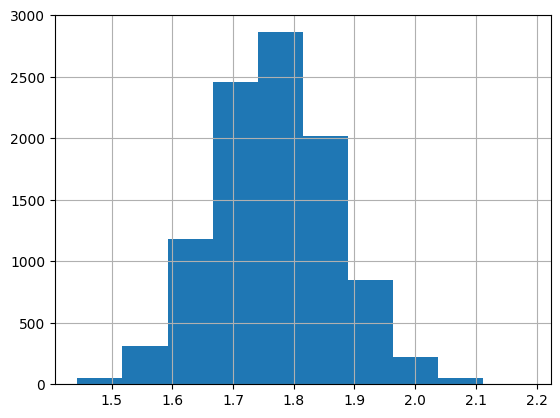

In [119]:
estimate_df['estimate'].hist()

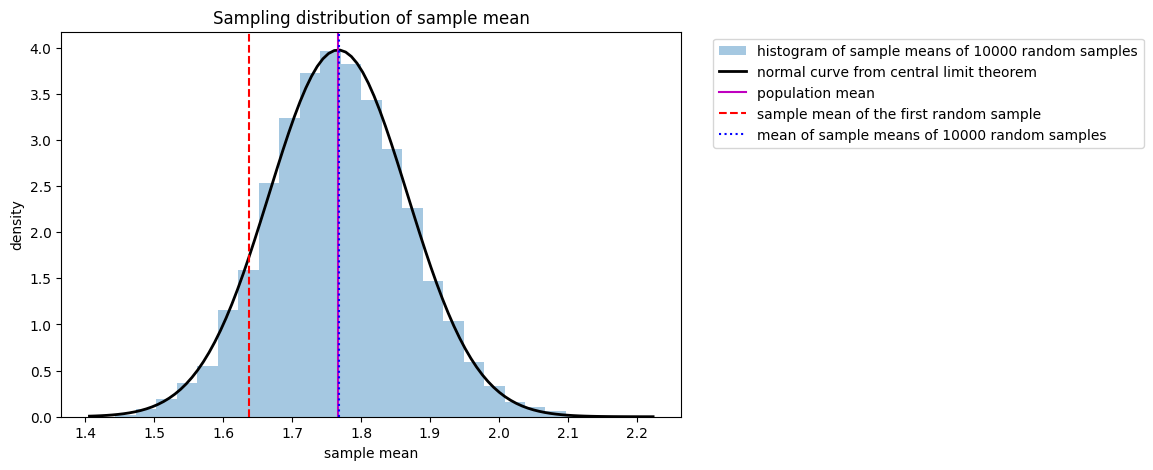

In [120]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, stats.tstd(estimate_df['estimate']))
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 2.3 or above.<br>

The Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** Identifies which of these states are most likely to be affected, should the new federal policy be enacted.

1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

In [121]:
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
aqi_rre = data[data['state_name'].isin(rre_states)]
aqi_rre.groupby(['state_name']).agg({"aqi_log":"mean","state_name":"count"})

,aqi_log,state_name
state_name,,
California,2.413149,66
Florida,1.782627,12
Michigan,2.132079,9
Ohio,1.428586,12
Pennsylvania,1.257868,10
Texas,1.283000,10


<AxesSubplot:xlabel='state_name', ylabel='aqi_log'>

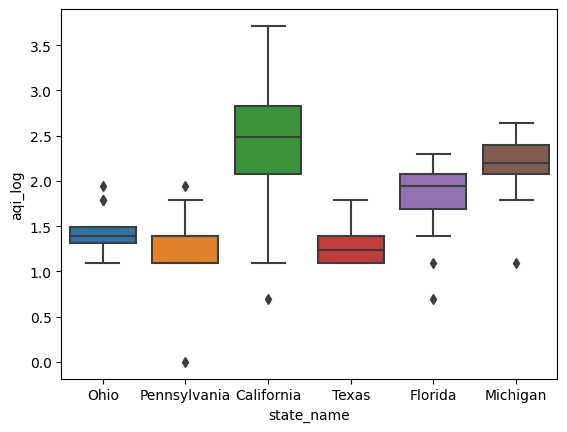

In [122]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi_log"])

- California: The mean and a signficant portion of the boxplot range over 2.3.
- Michigan: While the mean is below 2.3, the boxplot ranges above 2.3.

### Construct a confidence interval for the RRE state with the highest mean AQI

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

In [123]:
aqi_ca = data[data['state_name']=='California']

sample_mean = aqi_ca['aqi_log'].mean()
sample_mean

2.413148768367913

In [124]:
aqi_ca = data[data['state_name']=='Michigan']

sample_mean = aqi_ca['aqi_log'].mean()
sample_mean

2.132078533271569

### Confidence level

Confidence level chosen is 95%

In [125]:
confidence_level = 0.95
confidence_level

0.95

margin of error (ME)

**margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |

In [126]:
z_value = 1.96

In [127]:
standard_error = aqi_ca['aqi_log'].std() / np.sqrt(aqi_ca.shape[0])
standard_error

0.1525876076568751

In [128]:
margin_of_error = standard_error * z_value
margin_of_error

0.2990717110074752

### Calculate interval

In [129]:
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(1.8330068222640938, 2.4311502442790442)

### or

In [130]:
stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

C:\Users\lambert\AppData\Local\Temp\ipykernel_5492\2444374771.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)


(1.8330123177769657, 2.4311447487661724)

Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making.
ROA is considering the following decisions.

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

**Notes:**
1. Use 5% level of significance.


conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.


In [131]:
ca_la = data[data['county_name']=='Los Angeles']
ca_other = data[(data['state_name']=='California') & (data['county_name']!='Los Angeles')]

null and alternative hypotheses:

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


significance level:

In [132]:
significance_level = 0.05
significance_level

0.05

In [133]:
stats.ttest_ind(a=ca_la['aqi_log'], b=ca_other['aqi_log'], equal_var=False)

Ttest_indResult(statistic=2.6634948777424294, pvalue=0.01340695749474014)

With a p-value (0.013) being less than 0.05 (as your significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis.

Therefore, a metropolitan strategy may make sense in this case.

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?


In [134]:
ny = data[data['state_name']=='New York']
ohio = data[data['state_name']=='Ohio']

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.

In [135]:
stats.ttest_ind(a=ny['aqi_log'], b=ohio['aqi_log'], alternative='less', equal_var=False)

Ttest_indResult(statistic=-1.9751468128067786, pvalue=0.032154494571438326)


With a p-value (0.032) of less than 0.05 (as your significance level is 5%), **reject the null hypothesis in favor of the alternative hypothesis**.

Can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 2.3 or greater. Can you rule out Michigan from being affected by this new policy?


In [136]:
michigan = data[data['state_name']=='Michigan']

*   $H_0$: The mean AQI of Michigan is less than or equal to 2.3.
*   $H_A$: The mean AQI of Michigan is greater than 2.3.

comparing one sample mean relative to a particular value in one direction. Therefore, utilize a **one-sample  𝑡-test**.

In [137]:
stats.ttest_1samp(michigan['aqi_log'], 2.3, alternative='greater')

Ttest_1sampResult(statistic=-1.1004921651700383, pvalue=0.848437073160026)

With a p-value (0.848) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.10), **fail to reject the null hypothesis**.

Cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 2.3. This implies that Michigan would not be affected by the new policy.

It is unlikely that Michigan would be affected by the new policy